# ===================================
# 1. Import Libraries
# ===================================

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Set the styles for plots

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


# ===================================
# 2. Load the Google Forms Data
# ===================================
# Replace 'survey.csv' with your file name

In [4]:
df = pd.read_csv("deep-fake-survey.csv")

## Quick preview of data

In [5]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (30, 18)


,Timestamp,I consent to participate in this research study on deepfake cybersecurity threats and understand that all data will remain anonymous.,Are you currently working in one of the following fields?,How familiar are you with the concept of deepfakes?,Have you or your organisation experienced or investigated a deepfake-related incident?,Which of the following do you believe deepfakes can be used for? (Select all that apply),"Does your organisation currently have any policies, protocols or training programs related to deepfakes or synthetic media threats?",How confident are you in your organisation’s ability to detect or respond to deepfake threats?,Has your team received any formal training or awareness sessions related to deepfakes in the last 12 months?,Which of the following tools or methods have you heard of for detecting or verifying deepfakes? (Select all that apply),How effective do you believe current deepfake detection technologies are?,What do you perceive as the main barriers to implementing deepfake detection tools in organisations?,Are you aware of any national or international legal frameworks addressing the regulation of deepfakes or synthetic media?,How sufficient do you believe current legal frameworks are in addressing deepfake-related threats?,"Do you think there should be mandatory detection or labelling of synthetic content shared online (e.g., videos, images)?",Country of residence,Job title / role,Years of professional experience in your field
0,2025/07/28 12:18:58 PM GMT,Yes,NaN,3,No,Pornographic or non-consensual content;Politic...,No,2,No,"AI-based forensic tools (e.g., Deepware, Micro...",3,Cost,No,3,Yes,Ghana,Teaching,3–5
1,2025/07/28 12:34:01 PM GMT,Yes,Cybersecurity;IT Governance / Risk / Complianc...,3,No,Financial fraud / impersonation;Disinformation...,In development,2,Yes,"AI-based forensic tools (e.g., Deepware, Micro...",3,Lack of awareness or training,Yes,3,Yes,Ghana,Blockchain Engineer,3–5
2,2025/07/28 2:11:26 PM GMT,Yes,Technology Policy / Regulation,1,No,Financial fraud / impersonation;Disinformation...,Yes,3,Yes,"AI-based forensic tools (e.g., Deepware, Micro...",4,Lack of regulation or compliance pressure,No,2,Yes,Ghana,IT Instructor,6–10
3,2025/07/28 5:22:14 PM GMT,Yes,Cybersecurity,5,No,Financial fraud / impersonation;Disinformation...,Not sure,1,No,"AI-based forensic tools (e.g., Deepware, Micro...",3,Lack of regulation or compliance pressure,No,2,Yes,UK,Security Analist,0–2
4,2025/07/28 5:34:31 PM GMT,Yes,Information Technology Researcher,5,No,Financial fraud / impersonation;Disinformation...,Yes,5,No,"Browser or platform-level filters (e.g., Meta,...",2,Lack of regulation or compliance pressure,No,1,Yes,USA,Information Technology Researcher,0–2



# 2. Rename Columns for easier access

In [7]:
df.columns = [
    "Timestamp", "Consent", "Profession", "Awareness_Level", "Experienced_Incident",
    "Perceived_Uses", "Has_Policy", "Confidence_Level", "Recent_Training",
    "Tools_Awareness", "Effectiveness_Rating", "Barriers",
    "Policy_Awareness", "Policy_Sufficiency", "Mandatory_Labelling",
    "Country", "Job_Title", "Experience_Years"
]

# 3. Drop Timestamp if not needed

In [ ]:
df.drop(columns=["Timestamp"], inplace=True)

# 4. Replace NaN with 'No Response'

In [8]:
df.fillna("No Response", inplace=True)

# 5. Awareness Level Distribution

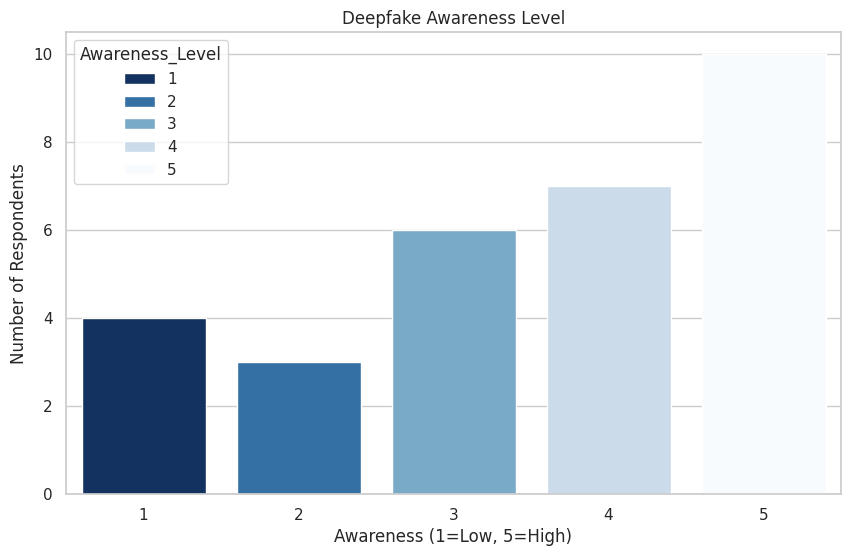

In [11]:
sns.countplot(x="Awareness_Level",hue="Awareness_Level", data=df, palette="Blues_r",)
plt.title("Deepfake Awareness Level")
plt.xlabel("Awareness (1=Low, 5=High)")
plt.ylabel("Number of Respondents")
plt.show()

# 6. Confidence in Detection

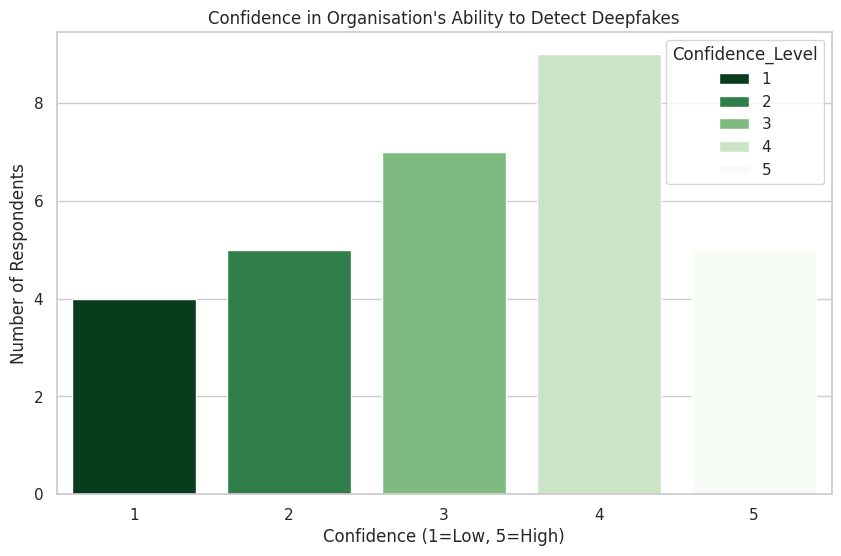

In [13]:

sns.countplot(x="Confidence_Level", hue="Confidence_Level", data=df, palette="Greens_r")
plt.title("Confidence in Organisation's Ability to Detect Deepfakes")
plt.xlabel("Confidence (1=Low, 5=High)")
plt.ylabel("Number of Respondents")
plt.show()


# 7. Barriers to Tool Adoption (split by ;)

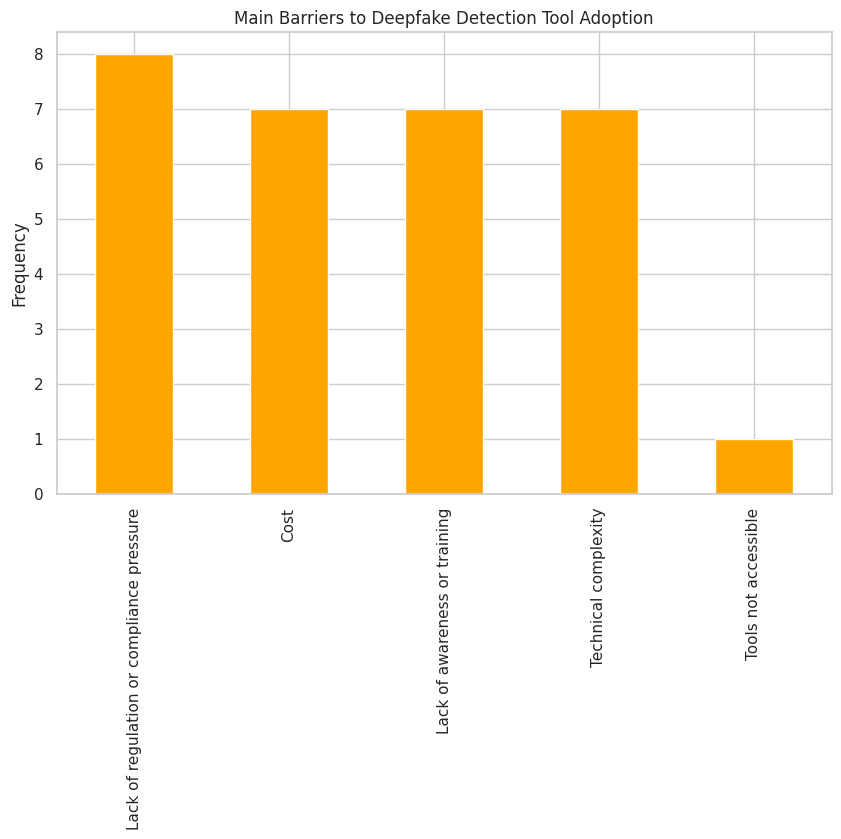

In [14]:

barriers_series = df["Barriers"].str.get_dummies(sep=';').sum().sort_values(ascending=False)
barriers_series.plot(kind='bar', color='orange')
plt.title("Main Barriers to Deepfake Detection Tool Adoption")
plt.ylabel("Frequency")
plt.show()


# 8. Tools Awareness (multi-choice split)

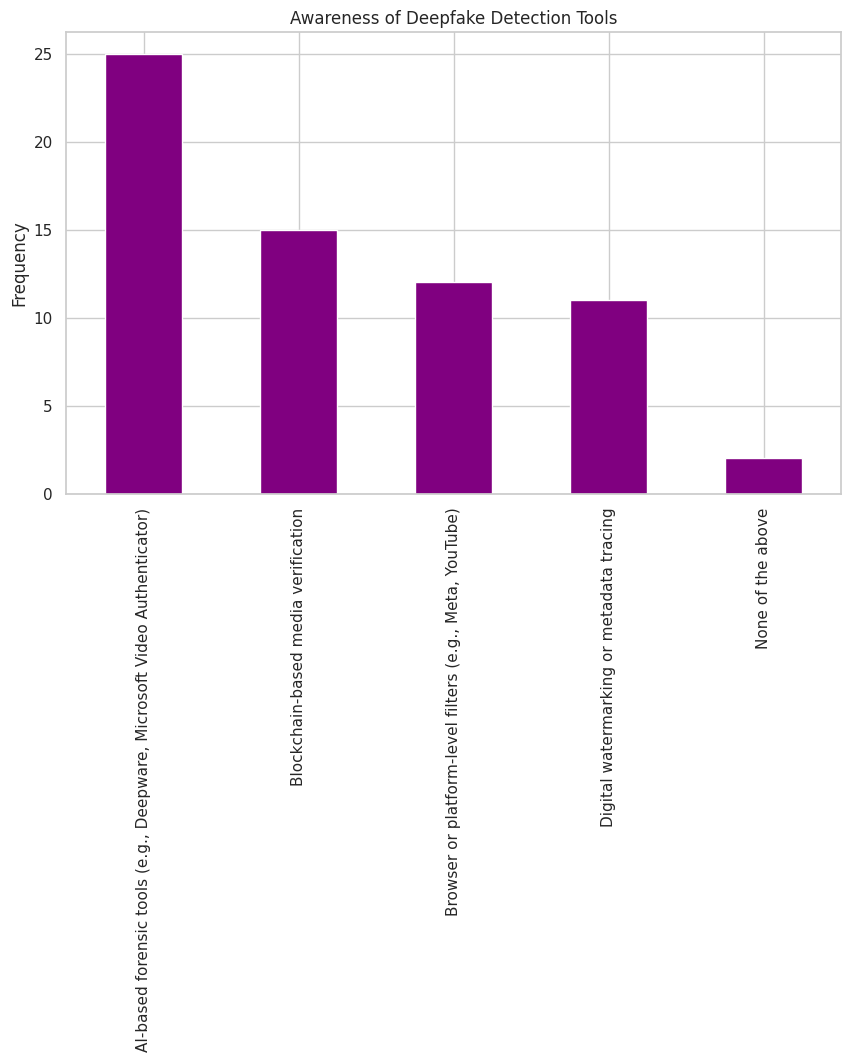

In [15]:

tools_series = df["Tools_Awareness"].str.get_dummies(sep=';').sum().sort_values(ascending=False)
tools_series.plot(kind='bar', color='purple')
plt.title("Awareness of Deepfake Detection Tools")
plt.ylabel("Frequency")
plt.show()

# 9. Save cleaned version

In [16]:

df.to_csv("processed_survey_data.csv", index=False)
print("Processed data saved as 'processed_survey_data.csv'")

Processed data saved as 'processed_survey_data.csv'


# Improvements

In [17]:
import scipy.stats as stats
import numpy as np

## Convert relevant columns to numeric where possible

In [18]:

df["Awareness_Level"] = pd.to_numeric(df["Awareness_Level"], errors='coerce')
df["Confidence_Level"] = pd.to_numeric(df["Confidence_Level"], errors='coerce')
df["Effectiveness_Rating"] = pd.to_numeric(df["Effectiveness_Rating"], errors='coerce')
df["Policy_Sufficiency"] = pd.to_numeric(df["Policy_Sufficiency"], errors='coerce')


## =================================
## 1. Chi-Square Test: Profession vs Awareness
## =================================

In [19]:

crosstab_prof_awareness = pd.crosstab(df["Profession"], df["Awareness_Level"])
chi2, p, dof, expected = stats.chi2_contingency(crosstab_prof_awareness)
print("\nChi-Square Test: Profession vs Awareness_Level")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Significant association")
else:
    print("No significant association")



Chi-Square Test: Profession vs Awareness_Level
Chi2 = 54.586, p-value = 0.2385, dof = 48
No significant association


## =========================
## 2. Chi-Square Test: Policy Awareness vs Policy Sufficiency
## =========================

In [21]:
crosstab_policy = pd.crosstab(df["Policy_Awareness"], df["Policy_Sufficiency"])
chi2, p, dof, expected = stats.chi2_contingency(crosstab_policy)
print("\nChi-Square Test: Policy_Awareness vs Policy_Sufficiency")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
if p < 0.05:
    print("Significant association")
else:
    print("No significant association")


Chi-Square Test: Policy_Awareness vs Policy_Sufficiency
Chi2 = 8.988, p-value = 0.3433, dof = 8
No significant association


## =========================
## 3. Spearman Correlation
## =========================

In [23]:
print("\nSpearman Correlation Results:")
correlations = [
    ("Awareness_Level", "Confidence_Level"),
    ("Effectiveness_Rating", "Policy_Sufficiency")
]
for var1, var2 in correlations:
    rho, pval = stats.spearmanr(df[var1], df[var2], nan_policy="omit")
    print(f"{var1} vs {var2}: Spearman rho = {rho:.3f}, p = {pval:.4f}")


Spearman Correlation Results:
Awareness_Level vs Confidence_Level: Spearman rho = 0.350, p = 0.0577
Effectiveness_Rating vs Policy_Sufficiency: Spearman rho = 0.397, p = 0.0299


## =========================
## 4. Correlation Heatmap
## =========================

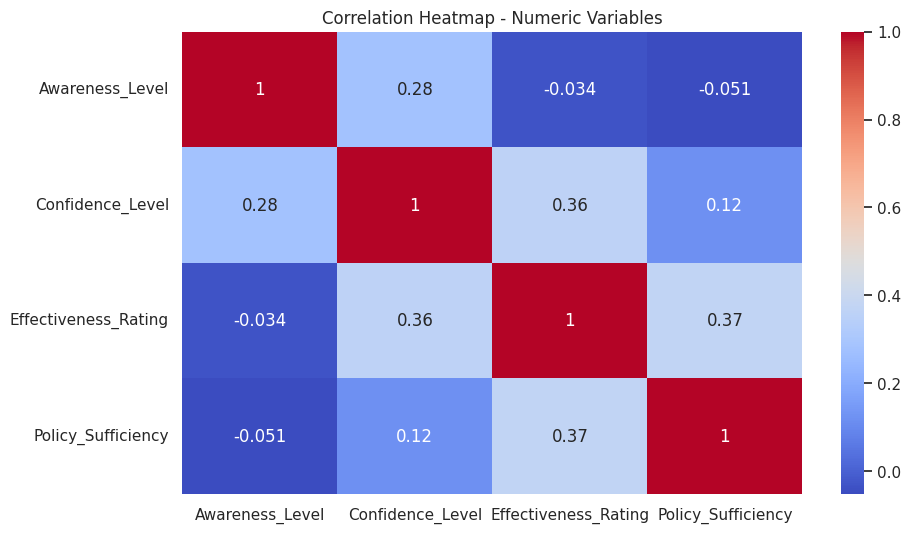

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Numeric Variables")
plt.show()


## Awareness Distribution

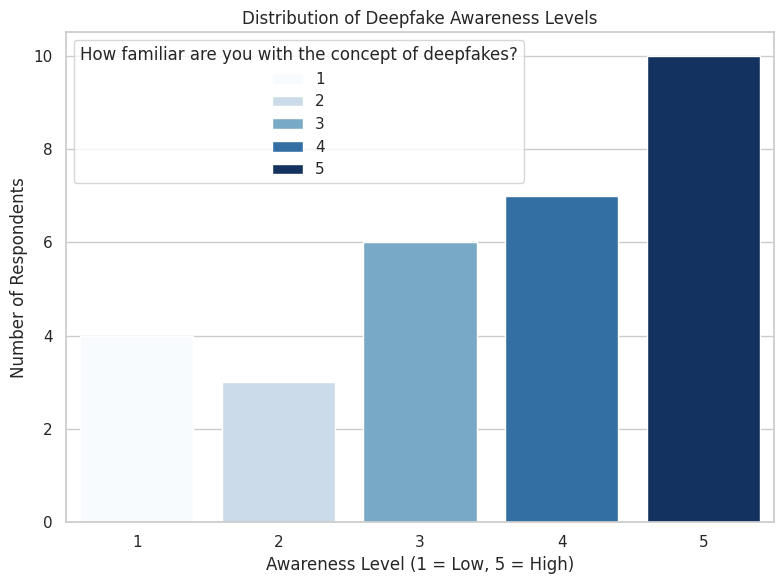

In [30]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV (update the file path if needed)
df = pd.read_csv("deep-fake-survey.csv")

# Set plot style
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(
    hue="How familiar are you with the concept of deepfakes?",
    x="How familiar are you with the concept of deepfakes?",
    data=df,
    palette="Blues"
)

# Label the axes and title
plt.xlabel("Awareness Level (1 = Low, 5 = High)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Deepfake Awareness Levels")

# Save the figure to file
plt.tight_layout()
plt.savefig("awareness_distribution.png", dpi=300)

# Show the plot (optional)
plt.show()
